In [1]:
#write name team with tabulate
from tabulate import tabulate

member_name = [

    ["HENG SEAKLONG", "Male", "Y3-AMS", "e20210329"],
    ["Bo Sane", "Female", "Y3-AMS", "e20210271"],
    ["Dok Dominique", "Female", "Y3-AMS", "e20210337"],
    ["CHHIN Visal", "Male", "Y3-AMS", "e20210742"],
    ["Vitou Ratanak", "Male", "Y3-AMS", "e2021***"],
]
member_info = ["Name", "Gender", "Program", "ID"]
print("Group 3:")
print(tabulate(member_name, headers=member_info, tablefmt="fancy_grid"))


Group 3:
╒═══════════════╤══════════╤═══════════╤═══════════╕
│ Name          │ Gender   │ Program   │ ID        │
╞═══════════════╪══════════╪═══════════╪═══════════╡
│ HENG SEAKLONG │ Male     │ Y3-AMS    │ e20210329 │
├───────────────┼──────────┼───────────┼───────────┤
│ Bo Sane       │ Female   │ Y3-AMS    │ e20210271 │
├───────────────┼──────────┼───────────┼───────────┤
│ Dok Dominique │ Female   │ Y3-AMS    │ e20210337 │
├───────────────┼──────────┼───────────┼───────────┤
│ CHHIN Visal   │ Male     │ Y3-AMS    │ e20210742 │
├───────────────┼──────────┼───────────┼───────────┤
│ Vitou Ratanak │ Male     │ Y3-AMS    │ e2021***  │
╘═══════════════╧══════════╧═══════════╧═══════════╛


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [3]:
email = pd.read_csv("mail_data.csv")
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
email.shape

(5572, 2)

In [5]:
email.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
from wordcloud import WordCloud, STOPWORDS

In [7]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in email.Message:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

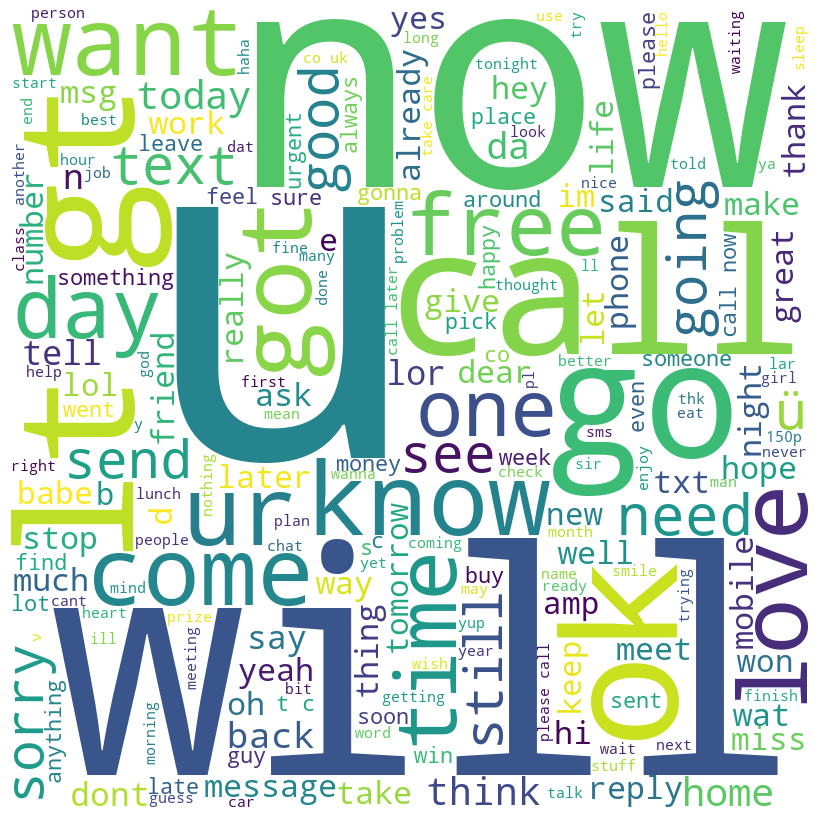

In [8]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [9]:

# Get the popular words and their frequencies
word_frequencies = wordcloud.words_

# Find full sentences containing popular words
popular_sentences = []
for word in word_frequencies.keys():
    # Check if the word is in any of the sentences
    for sentence in email.Message:
        if word in sentence.lower():
            popular_sentences.append(sentence)
            break

# Display the full sentences containing popular words
print("Full sentences containing popular words:")
for sentence in popular_sentences:
    print(sentence)

Full sentences containing popular words:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol
Go until jurong point, crazy.. Available only in bugis

In [10]:
#check dubplicat
email.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [11]:
#check 
print(email[email.duplicated()])

     Category                                            Message
103       ham  As per your request 'Melle Melle (Oru Minnamin...
154       ham  As per your request 'Melle Melle (Oru Minnamin...
207       ham  As I entered my cabin my PA said, '' Happy B'd...
223       ham                             Sorry, I'll call later
326       ham                   No calls..messages..missed calls
...       ...                                                ...
5524     spam  You are awarded a SiPix Digital Camera! call 0...
5535      ham  I know you are thinkin malaria. But relax, chi...
5539      ham                         Just sleeping..and surfing
5553      ham                        Hahaha..use your brain dear
5558      ham                             Sorry, I'll call later

[415 rows x 2 columns]


In [12]:
email.duplicated().sum()

415

In [13]:
email.drop_duplicates(inplace=True)

In [14]:
email.duplicated().sum()

0

In [15]:
# replace the null values with a null string
email = email.fillna('')

In [16]:
#encoding
# Map 'ham' to 0 and 'spam' to 1
email['Category'] = email['Category'].map({'ham': 0, 'spam': 1})

# Split the data into features (X) and labels (y)
X = email['Message']
y = email['Category']

# Convert features and labels to numpy arrays
X = np.array(X)
y = np.array(y)
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [17]:
y = y.reshape(-1,1)
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [18]:
print(tabulate(email.head(), headers=email.columns, tablefmt="fancy_grid"))

╒════╤════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│    │   Category │ Message                                                                                                                                                     │
╞════╪════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│  0 │          0 │ Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                             │
├────┼────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  1 │          0 │ Ok lar... Joking wif u oni...                                                             

## Buil Model

In [19]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# Define the gradient descent function
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

# Define the update function
def update_weights(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

# Define the prediction function
def predict(X, weight):
    return sigmoid(np.dot(X, weight))

# Define the training function
def train(X, y, weight, learning_rate, iterations):
    for i in range(iterations):
        h = predict(X, weight)
        gradient = gradient_descent(X, h, y)
        weight = update_weights(weight, learning_rate, gradient)
        
        if(i % 10 == 0):
            print(f'cost: {cost(h, y)} \t')
    return weight

In [20]:
import nltk
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
email['Message'] = email['Message'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(email['Message']).toarray()

In [22]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
y = np.array(email['Category'])
y


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [24]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
weight = np.zeros(train_X.shape[1])


In [26]:
learning_rate = 1
iterations = 1000


In [27]:
weight = train(train_X, train_y, weight, learning_rate, iterations)


cost: 0.6931471805599453 	


cost: 0.6799476784484476 	
cost: 0.6672763290721779 	
cost: 0.655109147740921 	
cost: 0.6434228010737892 	
cost: 0.6321946832139774 	
cost: 0.6214029737056127 	
cost: 0.6110266788546717 	
cost: 0.6010456585033914 	
cost: 0.5914406401610933 	
cost: 0.5821932223759007 	
cost: 0.5732858691218713 	
cost: 0.5647018968323918 	
cost: 0.5564254555480103 	
cost: 0.5484415054767838 	
cost: 0.5407357900963782 	
cost: 0.533294806765663 	
cost: 0.5261057756634268 	
cost: 0.5191566077353799 	
cost: 0.5124358722088913 	
cost: 0.5059327641280194 	
cost: 0.49963707226881743 	
cost: 0.49353914771570867 	
cost: 0.48762987331273555 	
cost: 0.48190063414744444 	
cost: 0.47634328917873914 	
cost: 0.4709501440820046 	
cost: 0.4657139253539668 	
cost: 0.46062775569506026 	
cost: 0.4556851306675572 	
cost: 0.4508798966125283 	
cost: 0.44620622979711555 	
cost: 0.44165861675497897 	
cost: 0.4372318357765696 	
cost: 0.43292093950164834 	
cost: 0.4287212385638034 	
cost: 0.42462828623531645 	
cost: 0.420637864020

In [28]:
predictions = predict(train_X, weight) >= 0.5


In [29]:
accuracy = np.mean(predictions == train_y) * 100
print(f"Accuracy: {accuracy}%")


Accuracy: 96.92121212121212%


In [32]:
# Assuming 'new_emails' is your new input data
new_emails = [
    'Congratulations! You have won a free ticket to the Bahamas. Text "FREE" to 123456 to claim your prize!',
    'You have won ?1,000 cash or a ?2,000 prize! To claim, call09050000327',
    'I\'m tired of arguing with you about this week after week. Do what you ',
    'You are a winner U have been specially selected 2 receive £1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810',
    "Nah I don't think he goes to usf, he lives around here though",
    "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
    "PRIVATE! Your 2003 Account Statement for 07753741225 shows 800 un-redeemed S. I. M. points. Call 08715203677 Identifier Code: 42478 Expires 24/10/04"
]
# Convert text to TF-IDF representation
new_X = vectorizer.transform(new_emails).toarray()
# Make predictions on the new input data
new_predictions = predict(new_X, weight) >= 0.5
# Print the predictions
for i in range(len(new_emails)):
    if new_predictions[i]:
        print(f'Email {i + 1}: Spam')
    else:
        print(f'Email {i + 1}: Not spam')

Email 1: Spam
Email 2: Spam
Email 3: Not spam
Email 4: Spam
Email 5: Not spam
Email 6: Not spam
Email 7: Spam


In [31]:
# Save the model weights
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(weight, model_file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [ ]:
# # Remove English stop words
# import nltk
# nltk.download('punkt')
# stop_words = set(stopwords.words('english'))
# email['Message'] = email['Message'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# # Convert text to TF-IDF representation
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(email['Message']).toarray()

# # Convert labels to numpy array
# y = np.array(email['Category'])

# # Split data into training and testing sets
# train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize weights
# weight = np.zeros(train_X.shape[1])

# # Set hyperparameters
# learning_rate = 0.01
# iterations = 1000

# # Train the model
# weight = train(train_X, train_y, weight, learning_rate, iterations)

# # Make predictions on the test set
# predictions = predict(train_X, weight) >= 0.5

# # Calculate accuracy
# accuracy = np.mean(predictions == train_y) * 100
# print(f"Accuracy: {accuracy}%")

In [ ]:
# import streamlit as st
# import pickle
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Load the weights from disk
# weights = pickle.load(open('finalized_model.pkl', 'rb'))

# # Load the vectorizer from disk
# vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

# # Define the sigmoid and predict functions
# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

# def predict(X, weight):
#     return sigmoid(np.dot(X, weight))

# # Create a text input for the user to enter an email
# email = st.text_input('Enter an email to classify:')

# # When the 'Predict' button is clicked, make a prediction on the input email
# if st.button('Predict'):
#     # Transform the email into TF-IDF representation
#     email_transformed = vectorizer.transform([email]).toarray()

#     # Make a prediction on the transformed email
#     prediction = predict(email_transformed, weights) >= 0.5

#     # Display the prediction
#     if prediction:
#         st.write('This email is likely spam.')
#     else:
#         st.write('This email is likely not spam.')

In [ ]:

# # Combine x1, x2, x3, x4, and x5 into a list of tuples
# combined_data = list(zip(X , y))



# # Determine the split indices
# split_index = int(0.8 * len(combined_data))

# # Split the data into training and testing datasets
# train_data = combined_data[:split_index]
# test_data = combined_data[split_index:]

# # Separate the datasets back into individual variables
# train_X, train_y = zip(*train_data)
# test_X, test_y = zip(*test_data)

# # Convert lists to numpy arrays

# train_X = np.array(train_X)
# train_y = np.array(train_y)

# test_X = np.array(test_X)
# test_y = np.array(test_y)

# # Print the split data (optional)
# print("Training data:")
# print("X:", train_X)
# print("y:", train_y)
# print("\nTesting data:")
# print("X:", test_X)


In [ ]:
# import pickle

# # Define the 'model' variable
# model = ...

# # Save the model to disk
# filename = 'finalized_model.pkl'
# pickle.dump(model, open(filename, 'wb'))

# # Save the vectorizer to disk
# filename = 'vectorizer.pkl'
# pickle.dump(vectorizer, open(filename, 'wb'))

In [ ]:
# import numpy as np

# # Sigmoid function
# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

# # Initialize weights
# def initialize_weights(num_features):
#     return np.zeros((num_features, 1))

# # Hypothesis function
# def hypothesis(X, theta):
#     return sigmoid(np.dot(X, theta))

# # Cost function
# def cost_function(X, y, theta):
#     m = len(y)
#     h = hypothesis(X, theta)
#     epsilon = 1e-5  # small value to avoid log(0)
#     cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
#     return cost

# # Gradient descent
# def gradient_descent(X, y, theta, alpha):
#     m = len(y)
#     h = hypothesis(X, theta)
#     y = y.reshape(-1, 1)  # reshape y to a column vector
#     gradient = np.dot(X.T, (h - y)) / m
#     theta -= alpha * gradient
#     return theta

# # Predict function
# def predict(X, theta):
#     h = hypothesis(X, theta)
#     return np.where(h >= 0.5, 1, 0)

# # Training function
# def train(X, y, alpha, num_iterations):
#     num_features = X.shape[1]
#     theta = initialize_weights(num_features)
#     for i in range(num_iterations):
#         theta = gradient_descent(X, y, theta, alpha)
#         if i % 100 == 0:  # print cost every 100 iterations
#             print(f"Iteration: {i}, Cost: {cost_function(X, y, theta)}")
#     return theta


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split


In [ ]:
# # Assuming 'email' is a DataFrame and 'email_text' is the name of the column that contains the email text
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(email['Message'])  # Replace 'email_text' with the actual column name

# # Convert labels to numpy array
# y = np.array(email['Category'])

# # Split data into training and testing sets
# train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert train_X and train_y to numpy arrays of floats
# train_X = train_X.astype(float).toarray()
# train_y = train_y.astype(float)

# # Convert test_X and test_y to numpy arrays of floats
# test_X = test_X.astype(float).toarray()
# test_y = test_y.astype(float)

# # Set hyperparameters
# alpha = 0.01
# num_iterations = 1000

# # Train the model
# theta = train(train_X, train_y, alpha, num_iterations)

# # Make predictions on the test set
# predictions = hypothesis(test_X, theta) >= 0.5

# # Calculate accuracy
# accuracy = np.mean(predictions == test_y) * 100
# print(f"Accuracy: {accuracy}%")

In [ ]:
# # Assuming 'new_emails' is your new input data
# new_emails = [
#     "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
#     "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
#     "Nah I don't think he goes to usf, he lives around here though",
#     "SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"
# ]
# new_X = vectorizer.transform(new_emails)

# # Convert new_X to a numpy array of floats
# new_X = new_X.astype(float).toarray()

# # Make predictions on the new data
# new_predictions = hypothesis(new_X, theta) >= 0.5

# # Convert predictions to 'spam' or 'ham'
# new_predictions = ['spam' if prediction else 'ham' for prediction in new_predictions]

# print(new_predictions)